<a href="https://colab.research.google.com/github/teacher-jiejie/Lets-get-it-Python-Book-Code/blob/main/9%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 9.1 데이터 준비: 파일에서 데이터 읽어들이기
#### 9.1.1 CSV 파일이란
#### 9.1.2 CSV 파일 읽어들이기


```
# 코랩에서 파일 업로드하기
from google.colab import files 
uploaded = files.upload()
```



In [ ]:
# 코랩에서 파일 업로드하기
from google.colab import files 
uploaded = files.upload()

Saving card.csv to card (1).csv


In [ ]:
import csv

f = open('card.csv', encoding='utf8') 
data = csv.reader(f)
next(data)
data = list(data)
print(data)

## 9.2  데이터 추출: 필요한 데이터만 골라내기
#### 9.2.1  원하는 데이터 추출하기

In [ ]:
print(type(data))

<class 'list'>


In [ ]:
print(len(data))

236


In [ ]:
print(data[0])

['2019-10-12 9:13', '1972753', '본', 'S&', '185', '네이버파이낸셜(주)', '546800', '일시불(A)', '부분취소']


In [ ]:
print(data[:3])

[['2019-10-12 9:13', '1972753', '본', 'S&', '185', '네이버파이낸셜(주)', '546800', '일시불(A)', '부분취소'], ['2019-10-12 11:56', '3399357', '본', 'S&', '185', 'GS  샵', '60440', '일시불(A)', '전표매입'], ['2019-10-13 9:16', '12621902', '본', 'S&', '185', 'G마켓', '91520', 'P(A)', '전표매입']]


In [ ]:
print(data[0][6])

546800


In [ ]:
print(data[0][5], data[0][6])

네이버파이낸셜(주) 546800


In [ ]:
print(data[0][0], data[0][5], data[0][6])

2019-10-12 9:13 네이버파이낸셜(주) 546800


#### 9.2.2 제어구조로 원하는 데이터 추출하기

In [ ]:
for row in data:
    print(row)

In [ ]:
for row in data:
    print(row[6])

In [ ]:
for row in data:
    print(row[0], row[5], row[6])

In [ ]:
for row in data:
    print(row[5], type(row[6]))

In [ ]:
for row in data:
    print(row[6], type(row[6]))

In [ ]:
for row in data:
    payment = int(row[6]) 
    print(payment, type(payment))

In [ ]:
for row in data : 
    payment = int(row[6])
    store = row[5]
    print(store,'에서',payment,'원 결제')

In [ ]:
for row in data : 
    date = row[0].split()[0]
    payment = int(row[-3])
    store = row[-4]
    print(date, store,'에서',payment,'원 결제')

In [ ]:
for row in data : 
    if row[-1] == '전표매입' : 
        print('구매확정!')
    else : 
        print('취소!')

In [ ]:
# 1분 퀴즈 1
for row in data : 
    payment = int(row[-3])
    month_pay = row[-2]
    print(payment,'원', month_pay,'로 결제')

## 9.3 데이터 분석 도전: 카드 이용내역 분석하기
#### 9.3.1 총 지출액 구하기

In [ ]:
spend = 0

for row in data :
    if row[-1] == '전표매입' : 
        payment = int(row[-3])
        spend += payment
print(spend)

8174028


#### 9.2.2 월별 지출액 그래프 그리기

In [ ]:
s_mon = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' : 
        mon, payment = row[0].split('-')[1], int(row[-3]) 
        idx = mon - 10
        s_mon[idx] += payment

print(s_mon)

TypeError: ignored

In [ ]:
s_mon = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' : 
        mon, payment = int(row[0].split('-')[1]), int(row[-3]) 
        idx = mon - 10
        s_mon[idx] += payment

print(s_mon)

[2093015, 4127744, 1953269]


In [ ]:
# 변수를 사용하지 않고 작성하기
s_mon = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' : 
        s_mon[int(row[0].split('-')[1]) - 10] += int(row[-3])

print(s_mon)

[2093015, 4127744, 1953269]


**구글 코랩에서 한글 글꼴 세팅하기**

1.   나눔폰트 설정하는 코드 실행하기
```
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
```

2.   런타임 -> 런타임 다시 시작 클릭
3.  글꼴 지정 코드 실행|
```
plt.rc('font', family='NanumGothic')
```





In [ ]:
# 구글 코랩에서만 실행
# 실행 후 [런타임]->[런타임 다시 시작] 클릭
# 코랩에 파일 업로드, CSV 파일 읽어들이기 코드 다시 실행
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and di

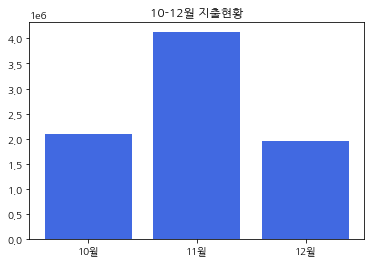

In [ ]:
import matplotlib.pyplot as plt

s_mon = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' : 
        mon, payment = int(row[0].split('-')[1]), int(row[-3]) 
        idx = mon - 10
        s_mon[idx] += payment

plt.rc('font', family='NanumGothic')
plt.title('10-12월 지출현황')
plt.bar(['10월','11월','12월'],s_mon, color = 'royalblue')
# plt.ticklabel_format(axis='y', style= 'plain').   # y축의 지수 표현 없애는 코드
plt.show()

#### 9.2.3 지출액 비교 그래프 그리기

In [ ]:
# 월별 택시비 지출액 그래프 그리기
taxi = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' and '택시' in row[5] : 
        mon, payment = int(row[0].split('-')[1]), int(row[-3]) 
        idx = mon-10
        taxi[idx] += payment

print(taxi)

[8600, 83900, 52800]


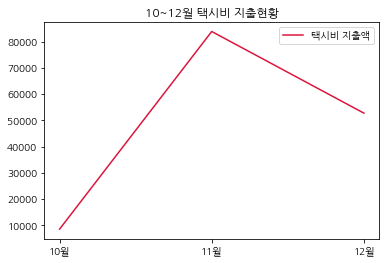

In [ ]:
plt.rc('font', family = 'NanumGothic')
plt.title('10~12월 택시비 지출현황')
plt.plot(['10월','11월','12월'],taxi, color = 'crimson', label ='택시비 지출액')
plt.legend()
plt.show()

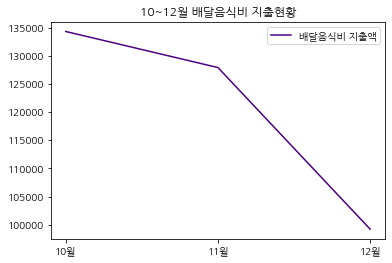

In [ ]:
# 월별 배달음식비 지출액 그래프 그리기
deli = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' and row[5] == '(주)우아한형제들': 
        mon, payment = int(row[0].split('-')[1]), int(row[-3]) 
        idx = mon-10        
        deli[idx] += payment

plt.rc('font', family = 'NanumGothic')
plt.title('10~12월 배달음식비 지출현황')
plt.plot(['10월','11월','12월'], deli, color = 'indigo', label ='배달음식비 지출액')
plt.legend()
plt.show()

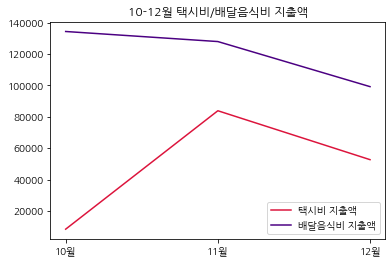

In [ ]:
plt.rc('font', family='NanumGothic')
plt.title('10-12월 택시비/배달음식비 지출액')
plt.plot(['10월','11월','12월'], taxi, color = 'crimson', label ='택시비 지출액')
plt.plot(['10월','11월','12월'], deli, color = 'indigo', label ='배달음식비 지출액')
plt.legend()
plt.show()

#### 9.2.4 지출액 상위 10개 항목 뽑기

In [ ]:
spending = {}

for row in data : 
    if row[-1] == '전표매입' : 
        store, payment = row[-4], int(row[-3])
        if store not in spending.keys() : 
            spending[store] = payment
        else : 
            spending[store] += payment

print(spending)

{'GS  샵': 60440, 'G마켓': 201630, '11번가': 151010, '네이버파이낸셜(주)': 1395840, '(주)에이랜드 타임스퀘어': 31600, '(주)곱': 96000, '카카오페이(택시)': 78000, '포도당': 75000, '에뛰드': 26410, '미니스톱신촌점': 1300, '(주)우아한형제들': 361430, '스패뉴시청지점': 61800, '티머니 개인택시': 27300, '스타벅스코리아': 100000, '전화결제': 207000, '케이데코(K Deco)': 48000, '씨제이올리브영(주)합정메세나폴': 23200, '타르타르홍대점': 23100, '연세내과의원': 159800, '나폴레옹과자점': 52600, '홈플러스익스프레스신촌점': 3990, '롯데E커머스': 16241, '(주)에스쁘아': 28500, '(주)현대백화점신촌점': 415502, 'SSG.COM': 260259, 'GS25 문래미원점': 1500, '(주)라크라센타본점': 18700, '크로키닷컴': 299610, '(주)이랜드월드영등포타임스퀘어': 100, '빠레뜨한남': 56500, '(주)신세계백화점강남점': 333800, '(주)엔터식스패션쇼핑몰 강남점': 26000, '어반플랜트': 57000, '곤트란쉐리에 합정점': 7830, '(주)갈라인터내셔널': 68500, '씨제이올리브영(주)신세계': 42020, '카페마마스타임스퀘어점': 64400, '조아약국': 2300, '씨유신촌제일점': 14200, '(주)이마트  신촌점': 305690, '스마일페이 (신라면세점)': 978035, '(주)디지탈명성텍': 4075, 'CU 오목교스퀘어점': 1600, '써브웨이 오목교점': 5900, '갤러리아명품관식품': 18200, '씨제이올리브영(주) 신촌역점': 29600, '파리바게뜨 (신촌점)': 3000, '(주)다른코스메틱스': 29000, '이유': 285000, '씨제이올리브영(주) 신촌': 9200, '주식회사 아성다이소':

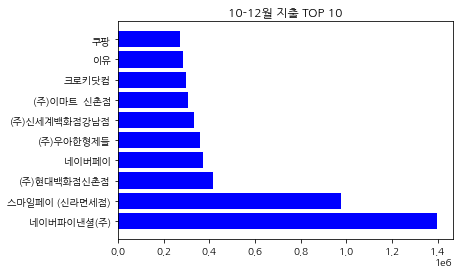

In [ ]:
import operator
import matplotlib.pyplot as plt

top10 = sorted(spending.items(), key = operator.itemgetter(1), reverse=True)[:10]

top10_store = []
top10_amount = []

for t in top10 : 
    top10_store.append(t[0])
    top10_amount.append(t[1])

plt.rc('font', family = 'NanumGothic')
plt.title('10-12월 지출 TOP 10')
plt.barh(top10_store, top10_amount, color = 'b')
plt.show()

#### Self Check

In [ ]:
# 1번
import csv

f = open('card.csv', encoding='utf8')
data = csv.reader(f)
next(data)
data = list(data)

# 취소거래의 총액 구하기
cancel =0

for row in data : 
    if row[-1] != '전표매입' : 
        cancel += int(row[-3])
print(cancel)

3245797


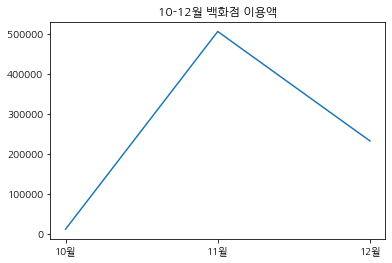

In [ ]:
# 2번 
department = [0,0,0]

for row in data : 
    if row[-1] == '전표매입' : 
        payment, store = int(row[-3]), row[-4]
        if '백화점' in store : 
            mon = int(row[0].split('-')[1])
            idx = mon-10
            department[idx]+=payment

plt.rc('font', family='NanumGothic')
plt.title('10-12월 백화점 이용액')
plt.plot(['10월','11월','12월'], department)
plt.show()